# DigitRecognizer Challenge:
This notebook will be a tutorial on how to use Neural Network frameworks like Tensorflow and Keras to recognize handwritten digit images that are provided on kaggle <a href = "https://www.kaggle.com/c/digit-recognizer">here.</a>

The dataset is a csv file containing 784 features and 1 label. The available features are the grayscale values of each pixel of the image (0 - 255). Each image has a resolution of 28x28.

1. [Data Load & Visualization](#DataLoad)
2. [Data Preprocessing](#DataPreprocessing)

In [47]:
#import statements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# <a name="DataLoad">Data Load & Visualization</a>

In [48]:
#Take a look at our data
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


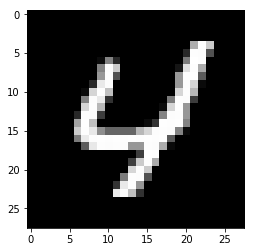

In [49]:
#store the data into lables and features
train_y = train['label']
train_x = train.drop(['label'], axis=1)

#convert the data into a 28x28 matrix and view as an image:
img1 = train_x.iloc[450] #random image, just to see how they look
img1.values.reshape(28,28)
plt.imshow(img1.values.reshape(28,28), cmap='gray')

# <a name="DataPreprocessing">Data Preprocessing</a>

So for this problem, I will be using a simple convolutional neural network. In order to do that, first I have to preprocess my data such that it resembles an image (Numpy Array with shape (28,28,1)). The following preprocess techniques will be used:
- Perform one hot encoding on our labels (ex 3 = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
- Reshape our input data into (28,28,1)

In [50]:
#Encoding labels
train_y_encoded = []
for num in train_y:
    if num == 0:
        train_y_encoded.append([1, 0, 0, 0, 0, 0, 0 ,0 ,0 ,0])
    elif num == 1:
        train_y_encoded.append([0, 1, 0, 0, 0, 0, 0 ,0 ,0 ,0])
    elif num == 2:
        train_y_encoded.append([0, 0, 1, 0, 0, 0, 0 ,0 ,0 ,0])
    elif num == 3:
        train_y_encoded.append([0, 0, 0, 1, 0, 0, 0 ,0 ,0 ,0])
    elif num == 4:
        train_y_encoded.append([0, 0, 0, 0, 1, 0, 0 ,0 ,0 ,0])
    elif num == 5:
        train_y_encoded.append([0, 0, 0, 0, 0, 1, 0 ,0 ,0 ,0])
    elif num == 6:
        train_y_encoded.append([0, 0, 0, 0, 0, 0, 1, 0 ,0 ,0])
    elif num == 7:
        train_y_encoded.append([0, 0, 0, 0, 0, 0, 0, 1 ,0 ,0])
    elif num == 8:
        train_y_encoded.append([0, 0, 0, 0, 0, 0, 0, 0 ,1 ,0])
    elif num == 9:
        train_y_encoded.append([0, 0, 0, 0, 0, 0, 0, 0 ,0 ,1])

train_y_encoded = np.array(train_y_encoded)
print(train_y_encoded.shape) #Error Checking: Should be 42000

(42000, 10)


In [51]:
#Reshape our input data
X = train_x.values
X = X.reshape(-1,28,28,1)
print(X.shape) #Should be [42000, 28, 28, 1]

(42000, 28, 28, 1)


## Training:
Now that our data is preprocessed, we will feed it into our neural network.

In [53]:
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout

#Convolutional Neural Network:
model = Sequential()
model.add(Conv2D(128, (3,3),input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3),activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(32, (3,3),activation='relu'))
model.add(Conv2D(16, (3,3),activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X, train_y_encoded,
          batch_size=128,
          epochs=5,
          validation_split = 0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/5
33600/33600 [==============================] - 241s 7ms/step - loss: 0.4916 - acc: 0.8793 - val_loss: 0.0813 - val_acc: 0.9756
Epoch 2/5
33600/33600 [==============================] - 235s 7ms/step - loss: 0.1094 - acc: 0.9661 - val_loss: 0.0549 - val_acc: 0.9823
Epoch 3/5
33600/33600 [==============================] - 231s 7ms/step - loss: 0.0722 - acc: 0.9779 - val_loss: 0.0509 - val_acc: 0.9850
Epoch 4/5
33600/33600 [==============================] - 233s 7ms/step - loss: 0.0602 - acc: 0.9803 - val_loss: 0.0391 - val_acc: 0.9875
Epoch 5/5
33600/33600 [==============================] - 232s 7ms/step - loss: 0.0535 - acc: 0.9830 - val_loss: 0.0553 - val_acc: 0.9830


In [59]:
#Use the model to make predictions on the test data and then submit it into the kaggle competition.
test_x = test.values.reshape(-1,28,28,1)

test_y = model.predict_classes(test_x)

In [62]:
#Make a dataframe for submission to kaggle
submissions=pd.DataFrame({"ImageId": list(range(1,len(test_y)+1)),
                         "Label": test_y})
submissions.to_csv("DR.csv", index=False, header=True)

With this model I managed to score **0.98 accuracy** on the kaggle competition.